In [61]:
require(forecast)
require(DataCombine)
require(tseries)

In [9]:
datats <- read.csv("/Users/imnfkhri/R/DataByte/AllCaseStudies/Forecasting/UK Outward Passengers Movement.csv")

In [10]:
summary(datats)
Hmisc::describe(datats)
str(datats)

      Year         Quarter      Air.Ireland   Other.EU.not.Ireland
 Min.   :1996   Min.   :1.00   Min.   : 708   Min.   : 4084       
 1st Qu.:1998   1st Qu.:1.75   1st Qu.:1040   1st Qu.: 6364       
 Median :2000   Median :2.50   Median :1158   Median : 7972       
 Mean   :2000   Mean   :2.50   Mean   :1165   Mean   : 8400       
 3rd Qu.:2003   3rd Qu.:3.25   3rd Qu.:1312   3rd Qu.:10178       
 Max.   :2005   Max.   :4.00   Max.   :1656   Max.   :14288       
 Rest.of.Europe.and.Med Rest.of.World      Total      
 Min.   :1233           Min.   :2887   Min.   :10222  
 1st Qu.:1681           1st Qu.:5087   1st Qu.:14206  
 Median :2072           Median :5551   Median :16998  
 Mean   :2214           Mean   :5637   Mean   :17494  
 3rd Qu.:2623           3rd Qu.:6362   3rd Qu.:20006  
 Max.   :4405           Max.   :7276   Max.   :27624  

datats 

 7  Variables      40  Observations
--------------------------------------------------------------------------------
Year 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      40        0       10    0.991     2000    3.385     1996     1997 
     .25      .50      .75      .90      .95 
    1998     2000     2003     2004     2005 
                                                            
Value      1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
Frequency     4    4    4    4    4    4    4    4    4    4
Proportion  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
--------------------------------------------------------------------------------
Quarter 
       n  missing distinct     Info     Mean      Gmd 
      40        0        4    0.938      2.5    1.282 
                              
Value         1    2    3    4
Frequency    10   10   10   10
Proportion 0.25 0.25 0.25 0.25
--------------------------------------------------------------

'data.frame':	40 obs. of  7 variables:
 $ Year                  : int  1996 1996 1996 1996 1997 1997 1997 1997 1998 1998 ...
 $ Quarter               : int  1 2 3 4 1 2 3 4 1 2 ...
 $ Air.Ireland           : int  708 845 1053 853 794 1010 1135 946 853 1091 ...
 $ Other.EU.not.Ireland  : int  4084 6329 7617 4788 4311 6824 8267 5200 4512 7615 ...
 $ Rest.of.Europe.and.Med: int  1233 1684 2075 1406 1368 1843 2281 1517 1450 1974 ...
 $ Rest.of.World         : int  4198 4691 2887 4936 4534 5195 6425 5314 4881 5698 ...
 $ Total                 : int  10222 13549 16632 11983 11007 14871 18108 12977 11796 16378 ...


# Generating timeseries

In [11]:
myts   <- ts(datats$Total, start=c(1996, 1), end=c(2005, 4), frequency=4)

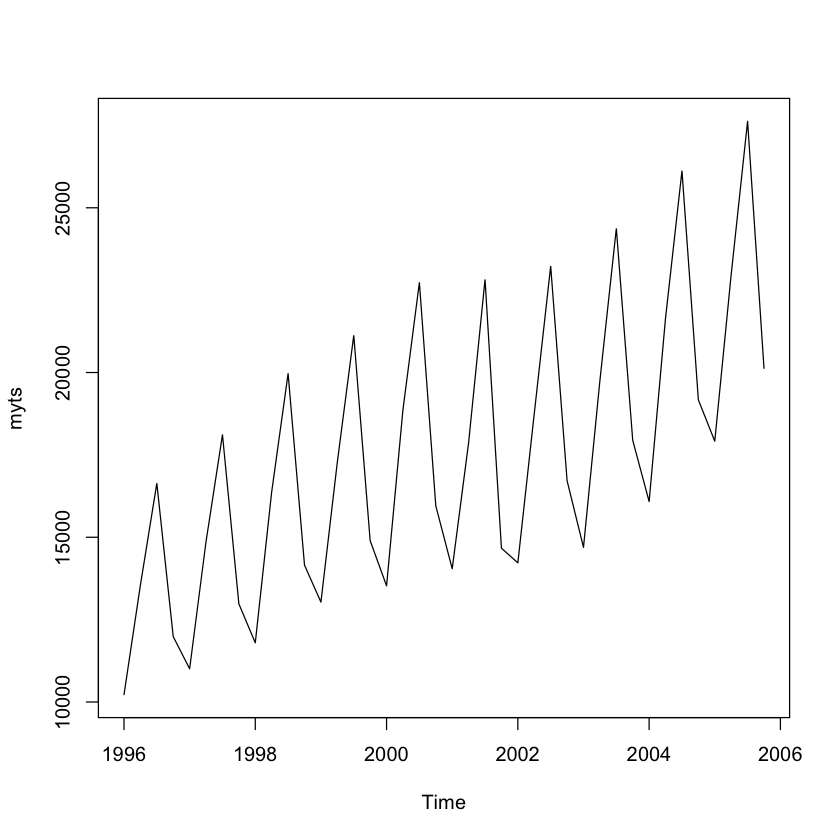

In [12]:
# Taking a glimpse at the model
plot(myts, axes=T)

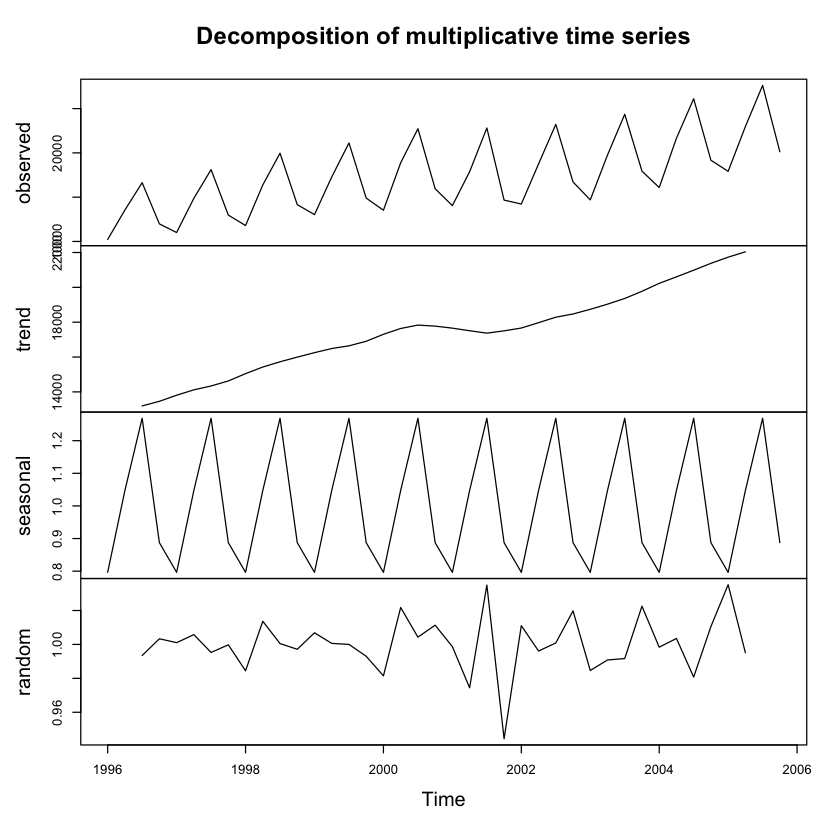

In [14]:
decomposed_myts<-decompose(myts, type = c("multiplicative"))
plot(decomposed_myts)

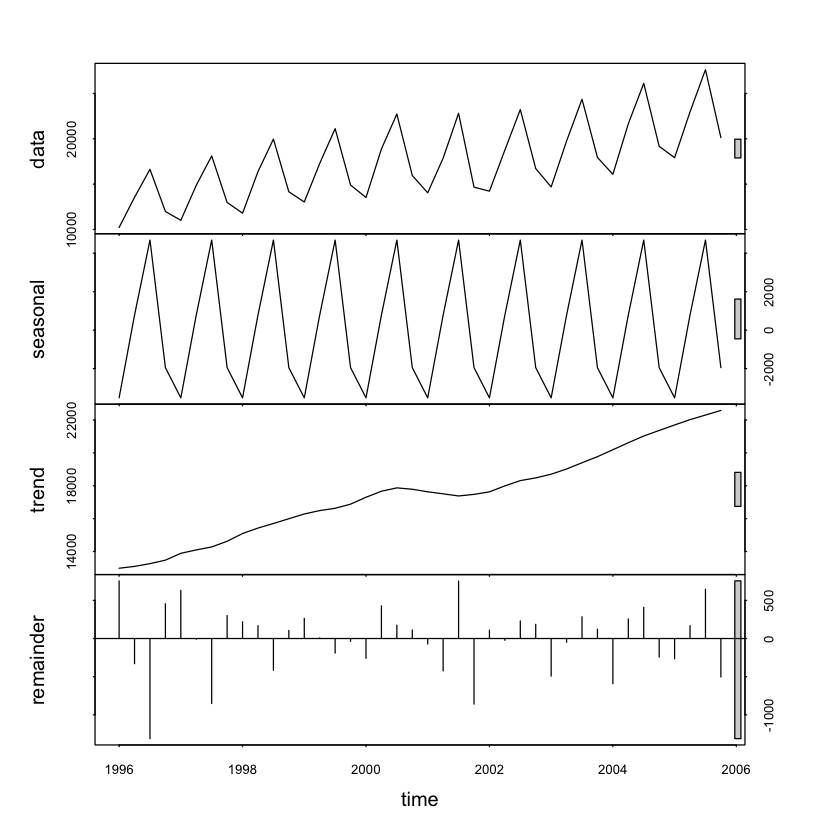

In [20]:
stl_myts <- stl(myts, s.window = "periodic")
plot(stl_myts)

### Forcast using stl decomp

In [34]:
forecast(stl_myts, h=4)

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2006 Q1       19167.94 18299.32 20036.56 17839.50 20496.37
2006 Q2       23709.42 22774.32 24644.52 22279.31 25139.53
2006 Q3       27849.44 26852.25 28846.63 26324.37 29374.51
2006 Q4       21464.63 20408.97 22520.29 19850.13 23079.13

# Exponential model

In [50]:
# simple exponential - models level
fit1 <- HoltWinters(myts, beta=FALSE, gamma=FALSE)
forecast::accuracy(fit1$fitted, myts)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1260.688,3803.236,3318.794,4.248278,18.10978,-0.02855096,0.8780205


In [51]:
# double exponential - models level and trend
fit2 <- HoltWinters(myts, gamma=FALSE)
forecast::accuracy(fit2$fitted, myts)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-496.8776,4429.283,3935.341,-7.773063,23.51175,0.1317536,1.067915


In [55]:
# triple exponential - models level, trend, and seasonal components
fit3 <- HoltWinters(myts)
forecast::accuracy(fit3$fitted, myts)
forecast(fit3, h=4)

# fit3 seems to be the most accurate

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-79.03984,610.3926,474.5054,-0.6824134,2.917488,0.002905161,0.1467941


        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2006 Q1       19009.79 18223.12 19796.46 17806.69 20212.89
2006 Q2       24086.86 23237.50 24936.22 22787.88 25385.84
2006 Q3       28650.73 27743.00 29558.47 27262.47 30038.99
2006 Q4       21373.84 20411.26 22336.41 19901.71 22845.96

In [54]:
# comparing results using forecast::ets()

fit4 <- forecast::ets(myts)
forecast::accuracy(fit4$fitted, myts)
forecast(fit4, h=4)

# fit4 RMSE & MAE is much lower than fit 3, thus fit4 is chosen

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-70.83687,444.9536,304.2904,-0.4838512,1.75779,0.002191918,0.1011713


        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2006 Q1       18193.29 17530.75 18855.83 17180.03 19206.55
2006 Q2       24223.19 23224.10 25222.28 22695.22 25751.16
2006 Q3       29573.43 28226.92 30919.93 27514.13 31632.73
2006 Q4       21002.51 19964.62 22040.40 19415.20 22589.82

In [59]:
summary(fit4)

ETS(M,A,M) 

Call:
 forecast::ets(y = myts) 

  Smoothing parameters:
    alpha = 0.5339 
    beta  = 0.0042 
    gamma = 1e-04 

  Initial states:
    l = 12611.067 
    b = 292.6913 
    s=0.888 1.2654 1.0491 0.7976

  sigma:  0.0284

     AIC     AICc      BIC 
651.4272 657.4272 666.6271 

Training set error measures:
                    ME     RMSE      MAE        MPE    MAPE      MASE
Training set -70.83687 444.9536 304.2904 -0.4838512 1.75779 0.2683008
                    ACF1
Training set 0.002191918


        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2006 Q1       18193.29 17530.75 18855.83 17180.03 19206.55
2006 Q2       24223.19 23224.10 25222.28 22695.22 25751.16
2006 Q3       29573.43 28226.92 30919.93 27514.13 31632.73
2006 Q4       21002.51 19964.62 22040.40 19415.20 22589.82

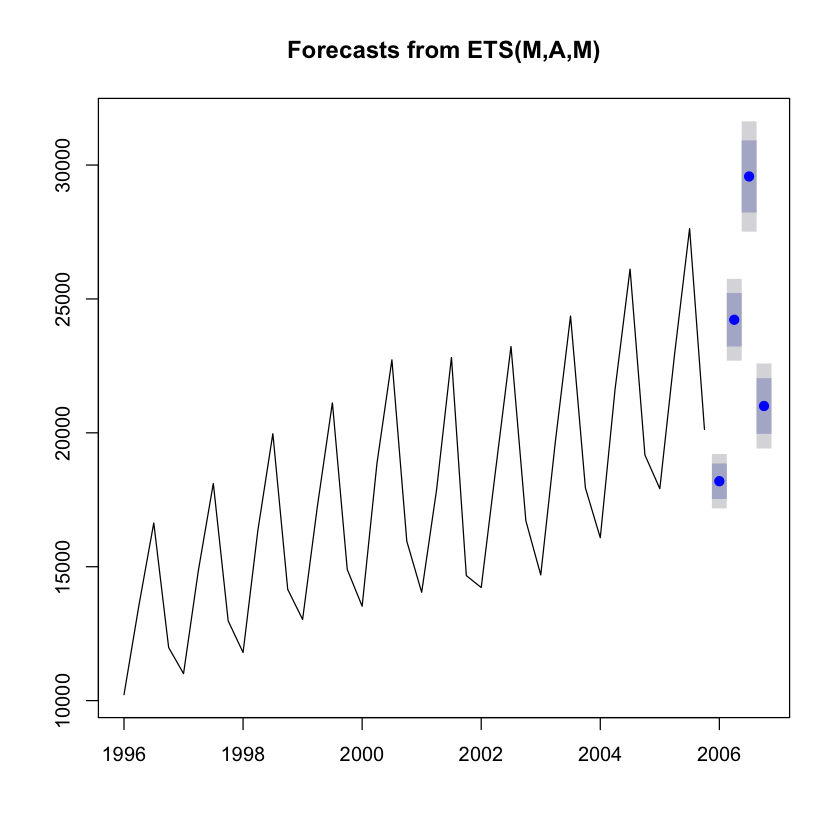

In [60]:
forecast(fit4, 4)
plot(forecast(fit4, 4))

# Using ARIMA model

## Creating lags

In [29]:
laggedTS <- stats::lag(myts, 3)
myDf <- as.data.frame(myts)
myDf <- slide(myDf, "x", NewVar = "xLag1", slideBy = -1)  # create lag1 variable
myDf <- slide(myDf, "x", NewVar = "xLead1", slideBy = 1)  # create lead1 variable
head(myDf)


Remember to put myDf in time order before running.

Lagging x by 1 time units.


Remember to put myDf in time order before running.

Leading x by 1 time units.



x,xLag1,xLead1
10222,NA,13549
13549,10222,16632
16632,13549,11983
11983,16632,11007
11007,11983,14871
14871,11007,18108


## Autocorelation

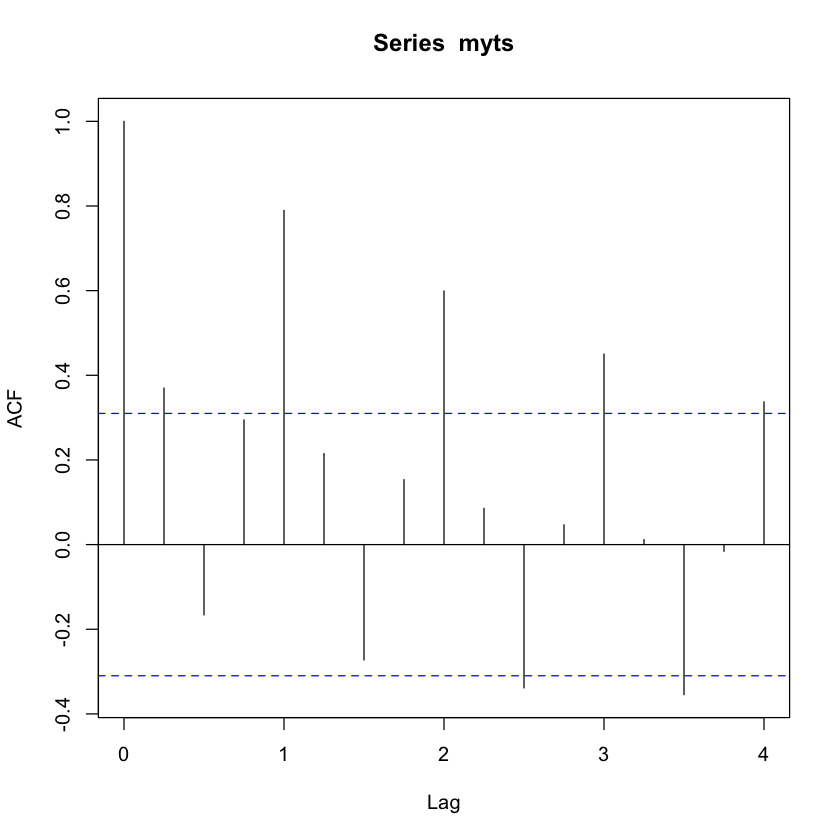

In [30]:
acfRes <- acf(myts) # autocorrelation

## Partial autocorrelation

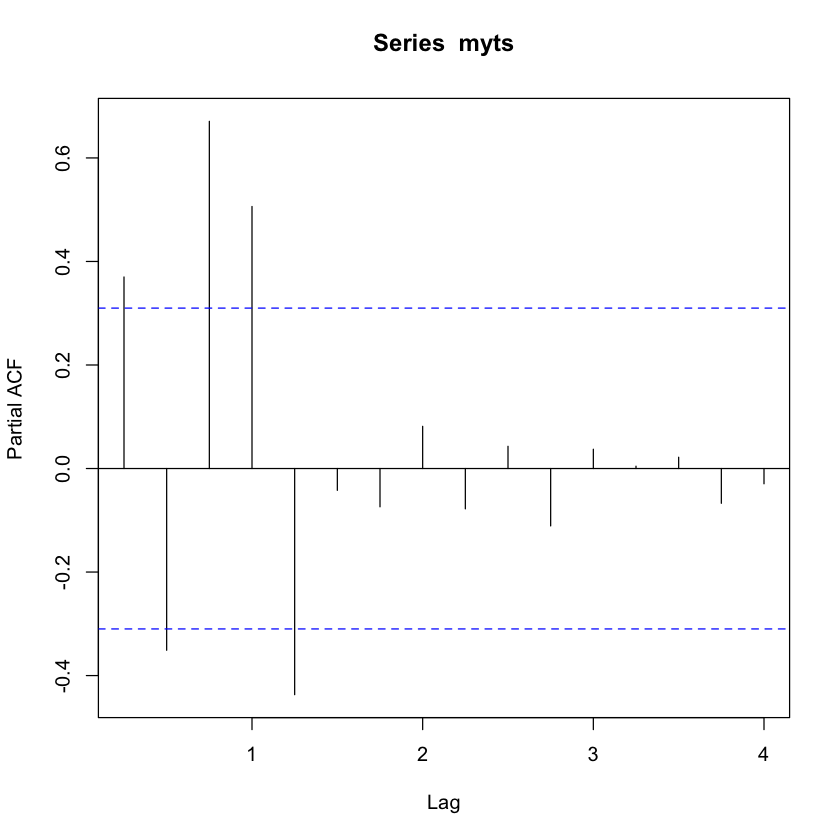

In [31]:
pacfRes <- pacf(myts)  # partial autocorrelation

## Detrend a time series

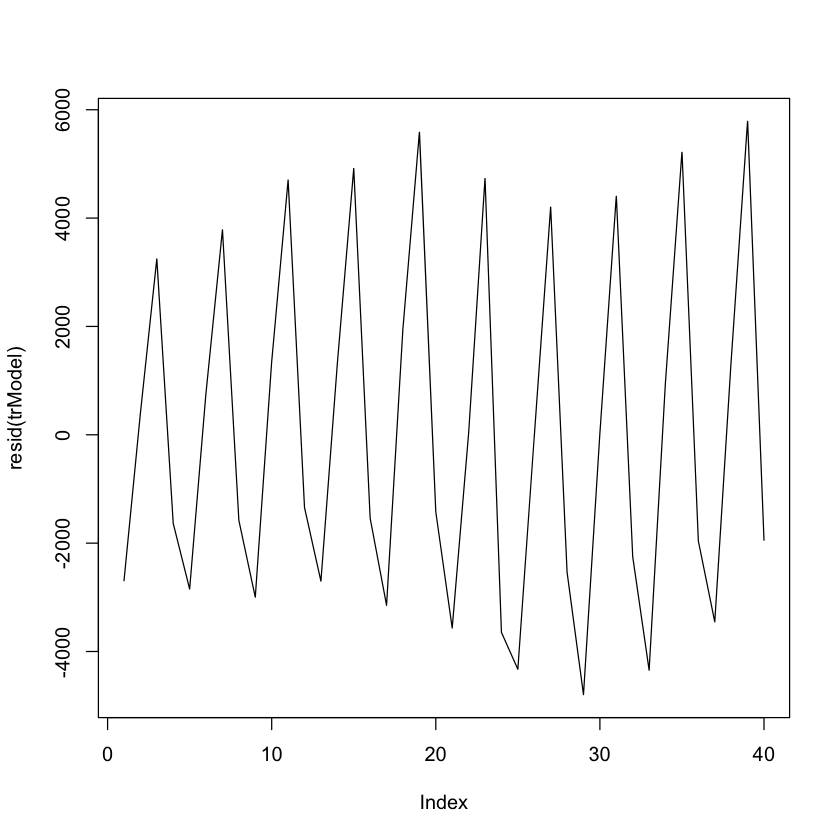

In [36]:
trModel <- lm(myts ~ c(1:length(myts)))
plot(resid(trModel), type="l")  # resid(trModel) contains the de-trended series.

## De-seasonalize data

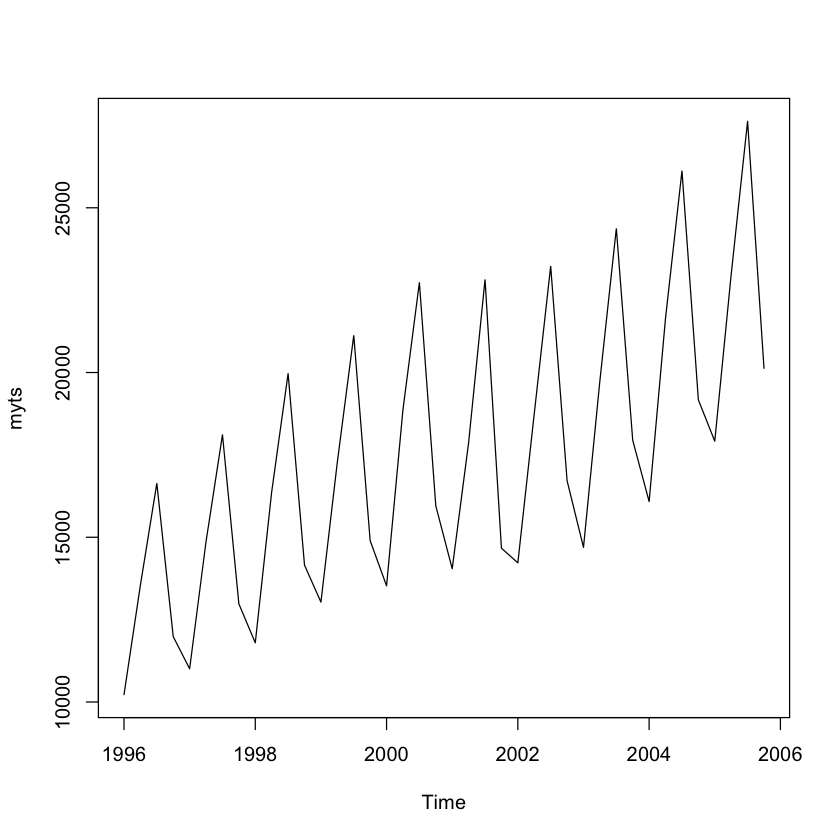

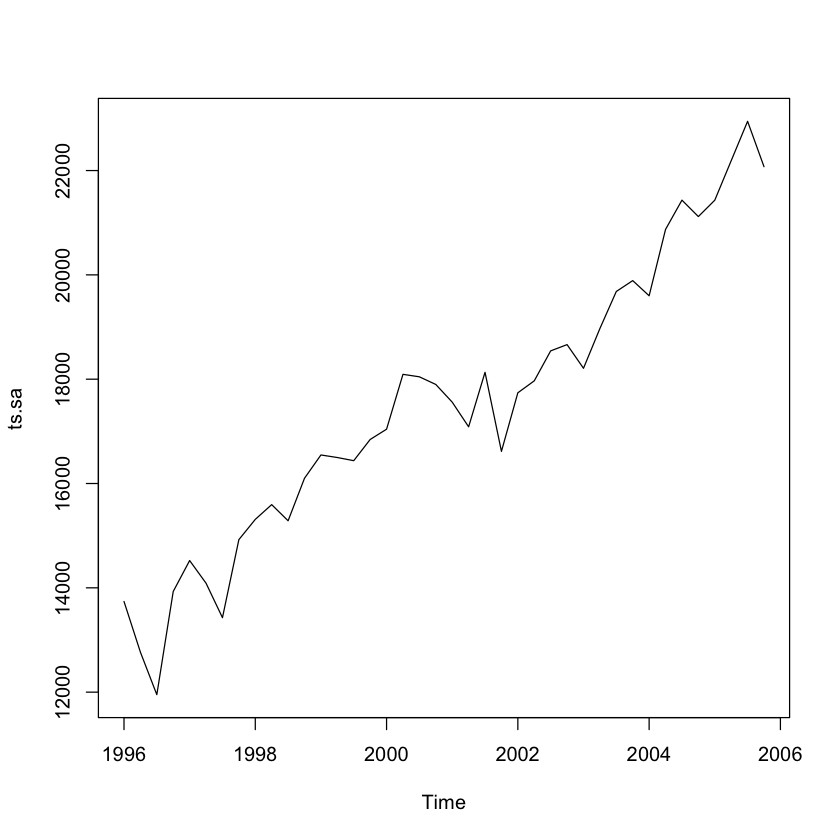

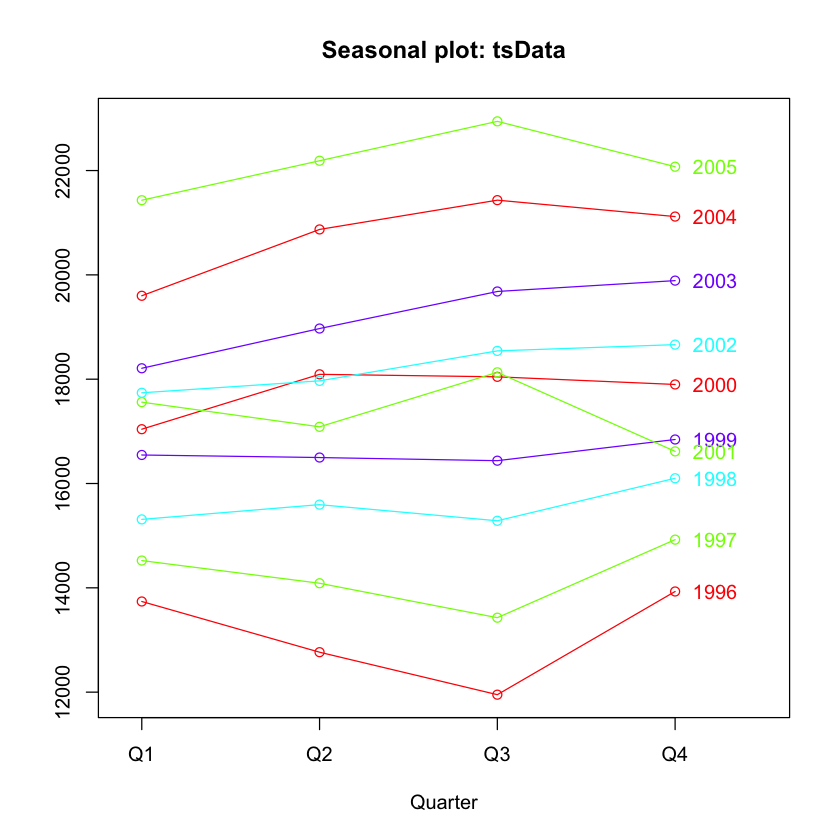

In [37]:
ts.stl <- stl(myts,"periodic")  # decompose the TS
ts.sa <- seasadj(ts.stl)  # de-seasonalize
plot(myts, type="l")  # original series
plot(ts.sa, type="l")  # seasonal adjusted
seasonplot(ts.sa, 4, col=rainbow(4), year.labels=TRUE, main="Seasonal plot: tsData") # seasonal frequency set as 12 for monthly data.

## Stationary check

In [62]:
tseries::adf.test(myts) # p-value < 0.05 indicates the TS is stationary
kpss.test(myts)

# Since TS is not stationary, need to make it so


	Augmented Dickey-Fuller Test

data:  myts
Dickey-Fuller = -0.71971, Lag order = 3, p-value = 0.9601
alternative hypothesis: stationary


Warning message in kpss.test(myts):
“p-value smaller than printed p-value”


	KPSS Test for Level Stationarity

data:  myts
KPSS Level = 1.1915, Truncation lag parameter = 1, p-value = 0.01


[1] 1

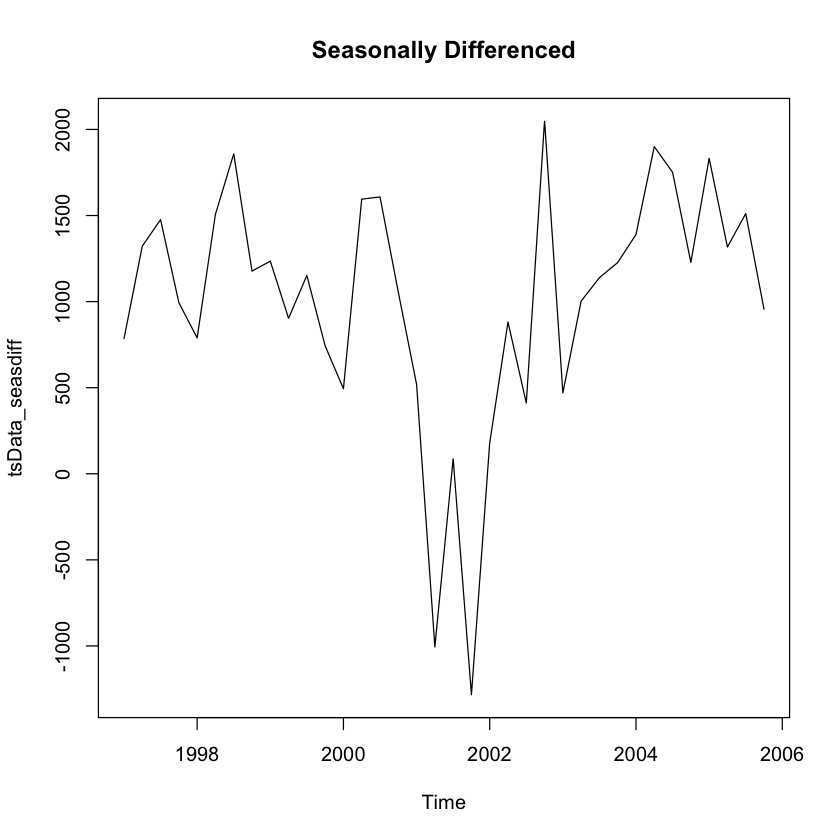

In [40]:
# Seasonal Differencing
nsdiffs(myts)  # number for seasonal differencing needed
# get 1 from nsdiffs

tsData_seasdiff <- diff(myts, lag=frequency(myts), differences=1)  # seasonal differencing
plot(tsData_seasdiff, type="l", main="Seasonally Differenced")  # still not stationary!

[1] 0

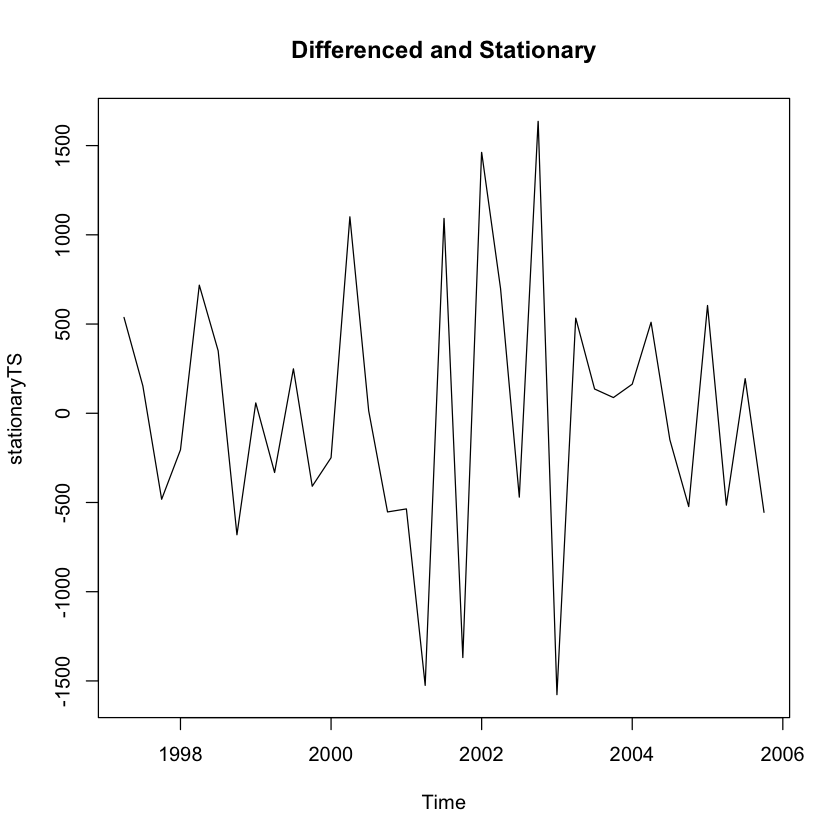

In [45]:
# Make it stationary
ndiffs(tsData_seasdiff)  # number of differences need to make it stationary
# 1 
stationaryTS <- diff(tsData_seasdiff, differences= 1)
plot(stationaryTS, type="l", main="Differenced and Stationary")  # appears to be stationary

## Rechecking stationary status

In [64]:
tseries::adf.test(stationaryTS) # p-value < 0.05 indicates the TS is stationary

# TS is now stationary, d value for ARIMA should be 2


	Augmented Dickey-Fuller Test

data:  stationaryTS
Dickey-Fuller = -3.8165, Lag order = 3, p-value = 0.03098
alternative hypothesis: stationary


### Checking ACF & PACF for stationaryTS

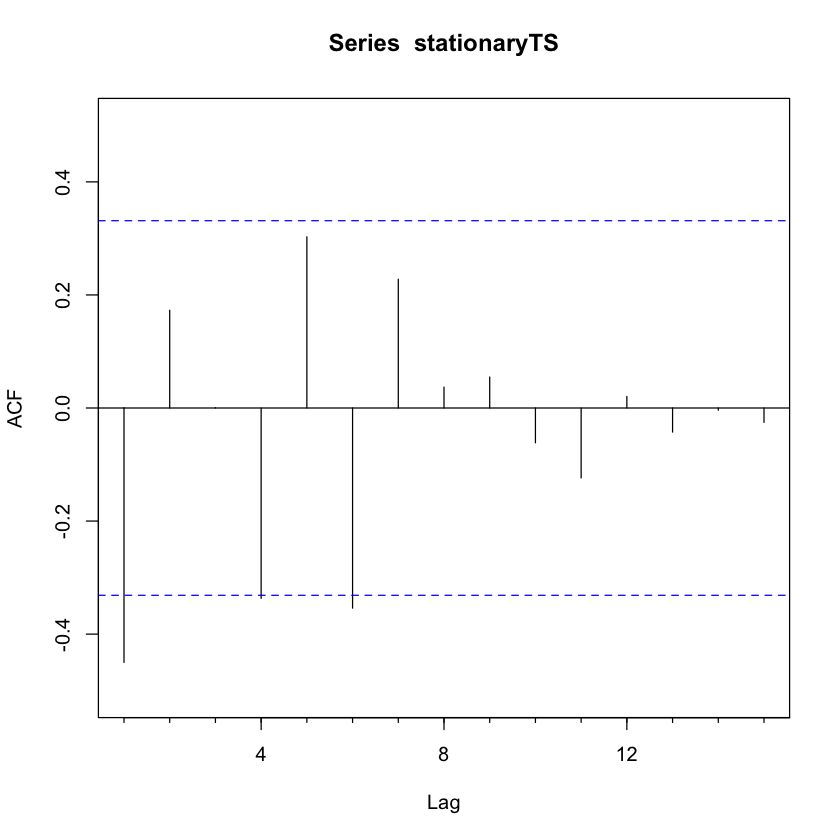

In [76]:
Acf(stationaryTS)
# We can see spikes at 1 and 4, so q value can be eiter

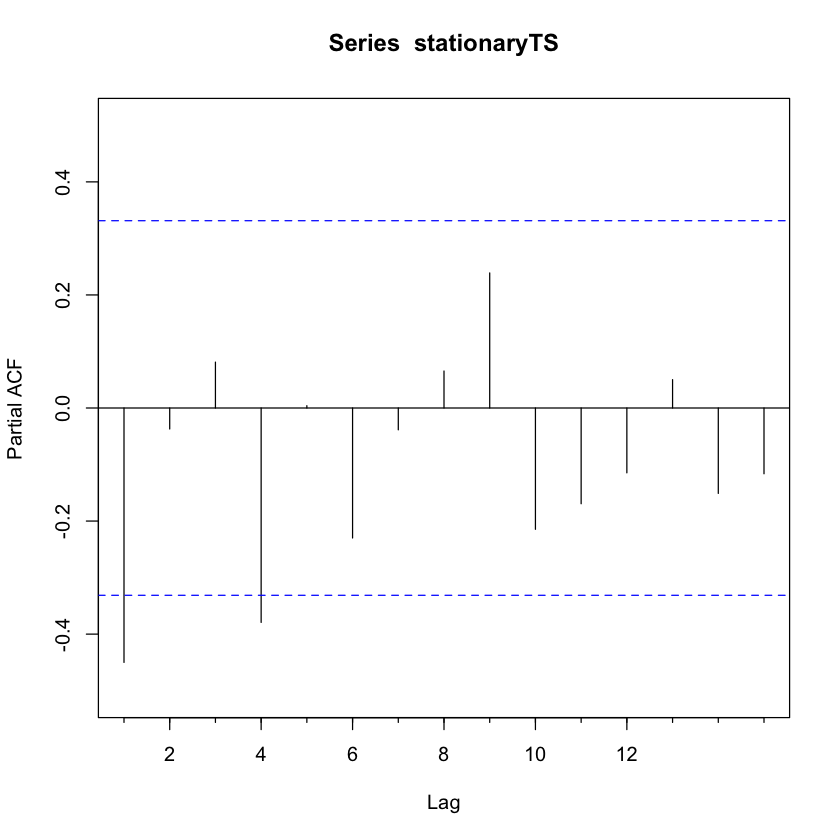

In [77]:
Pacf(stationaryTS)
# also we can observe the spikes at 1 and 4, p value can be either

# Moving averages

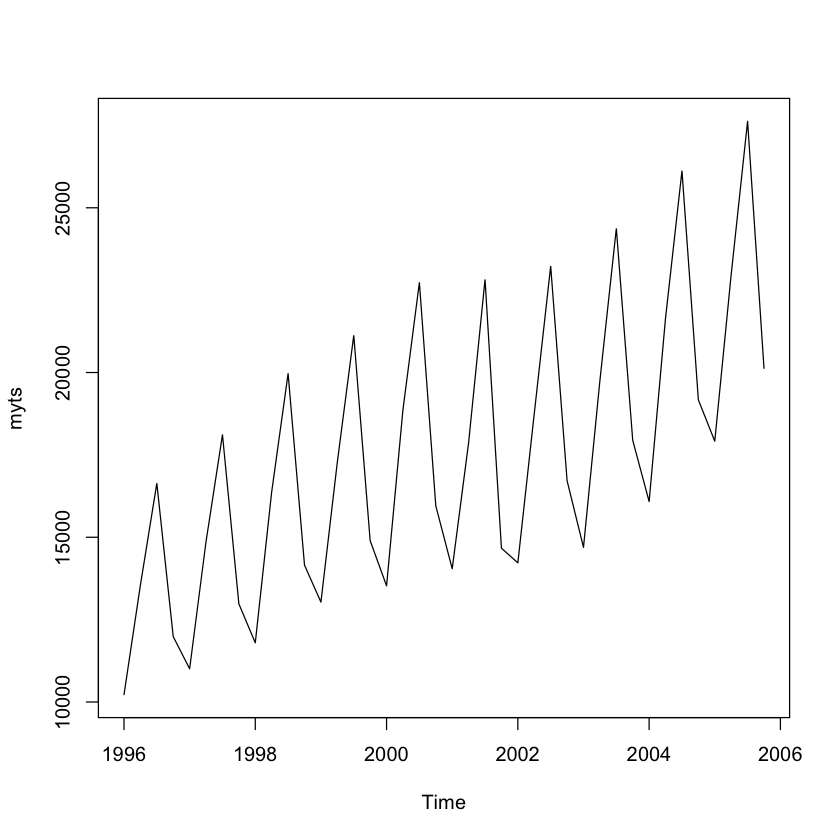

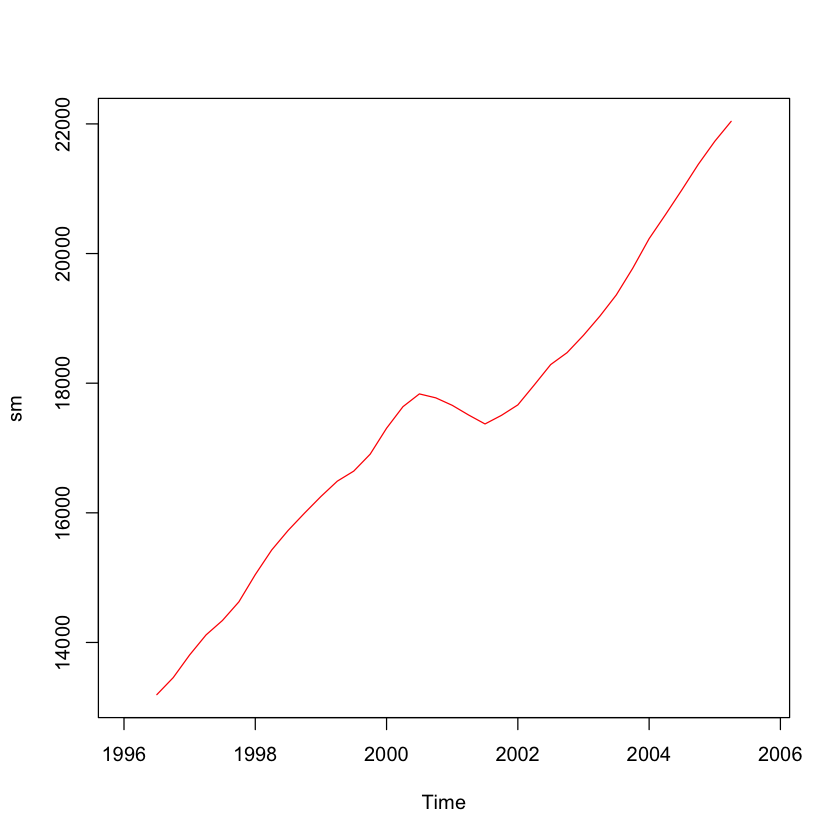

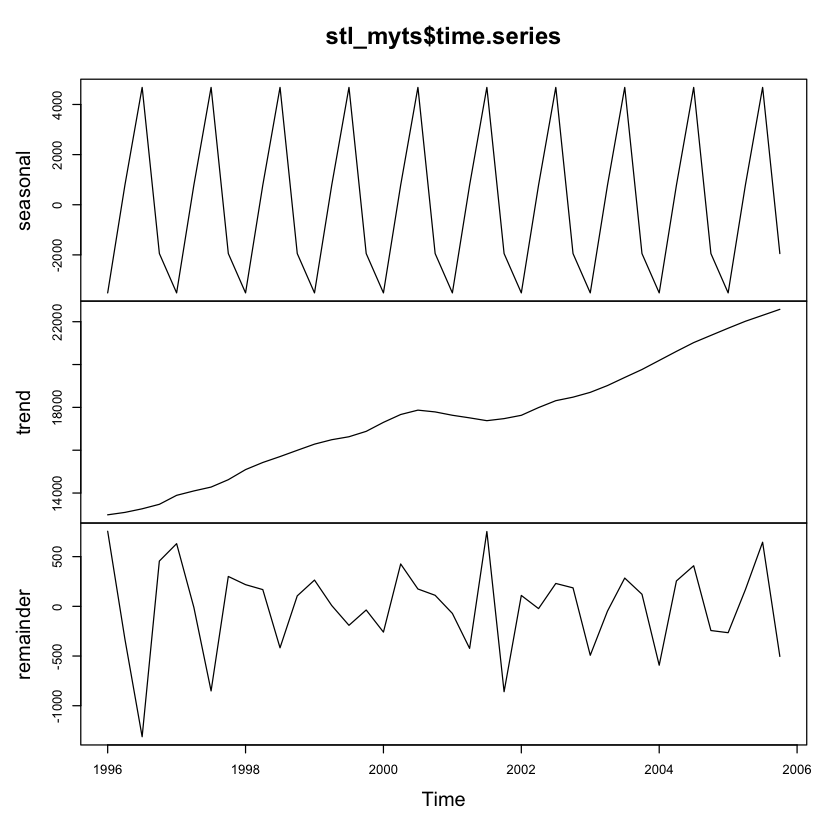

In [48]:
sm <- ma(myts, order=4, centre = TRUE) # 4 quarters moving average
plot(myts)
plot(sm, col="red") # plot

plot(stl_myts$time.series)

In [78]:
# 1 or 4 from PACF
# 2 from ndiff
# 1 or 4 from ACF

fit5 <- arima(stationaryTS, order=c(1, 2, 1))
summary(fit5)


Call:
arima(x = stationaryTS, order = c(1, 2, 1))

Coefficients:
          ar1      ma1
      -0.6920  -1.0000
s.e.   0.1182   0.0794

sigma^2 estimated as 813033:  log likelihood = -273.97,  aic = 553.94

Training set error measures:
                   ME    RMSE      MAE      MPE     MAPE      MASE       ACF1
Training set 63.46615 875.542 660.4826 62.15986 178.7915 0.6798792 -0.3431823


In [84]:
# fit an ARIMA model using forecast
fit6 <- forecast::auto.arima(myts)
summary(fit6)

# Clearly fit 6 is a better predictor

Series: myts 
ARIMA(1,0,0)(0,1,0)[4] with drift 

Coefficients:
         ar1     drift
      0.4548  250.2320
s.e.  0.1446   46.7407

sigma^2 estimated as 414238:  log likelihood=-282.98
AIC=571.97   AICc=572.72   BIC=576.72

Training set error measures:
                   ME    RMSE      MAE        MPE     MAPE      MASE       ACF1
Training set 4.292192 593.382 411.2786 -0.1773039 2.429914 0.3626351 -0.1052545


In [81]:
# Testing out using seasonal adjusted TS. Idk if this is correct or not, better than fit5
fit7 <- arima(ts.sa, order=c(1, 2, 1))
summary(fit7)


Call:
arima(x = ts.sa, order = c(1, 2, 1))

Coefficients:
          ar1      ma1
      -0.2300  -1.0000
s.e.   0.1681   0.0743

sigma^2 estimated as 503968:  log likelihood = -305.46,  aic = 616.91

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 104.8748 691.9404 534.1224 0.6315633 3.145312 0.8737982
                    ACF1
Training set -0.03985541


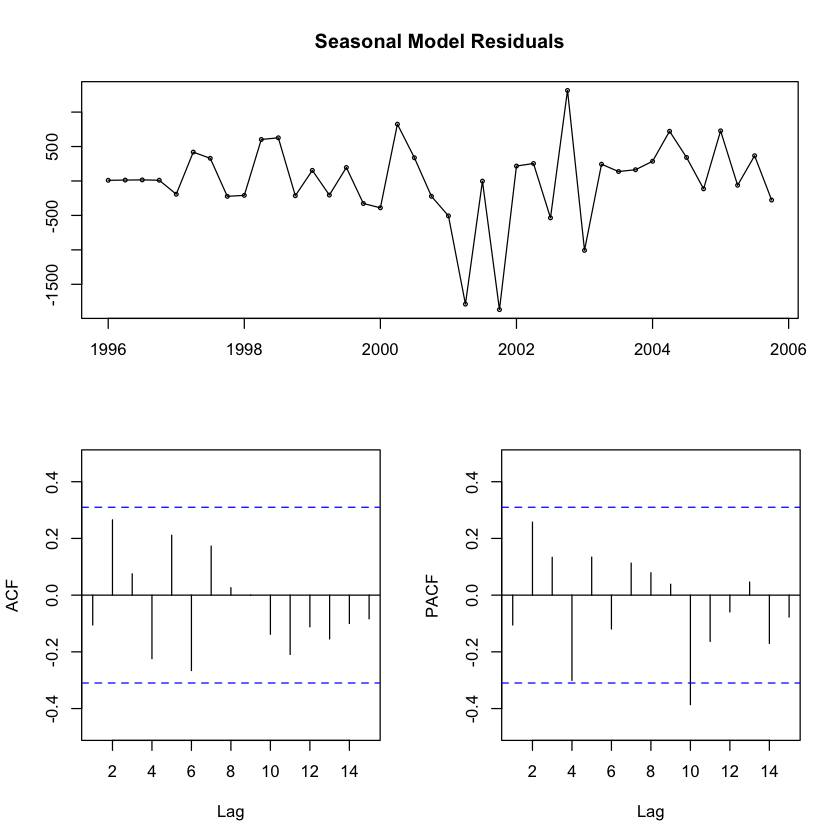

In [88]:
# Check for no significant autocorrelations presence in the model
tsdisplay(residuals(fit6), lag.max=15, main='Seasonal Model Residuals')

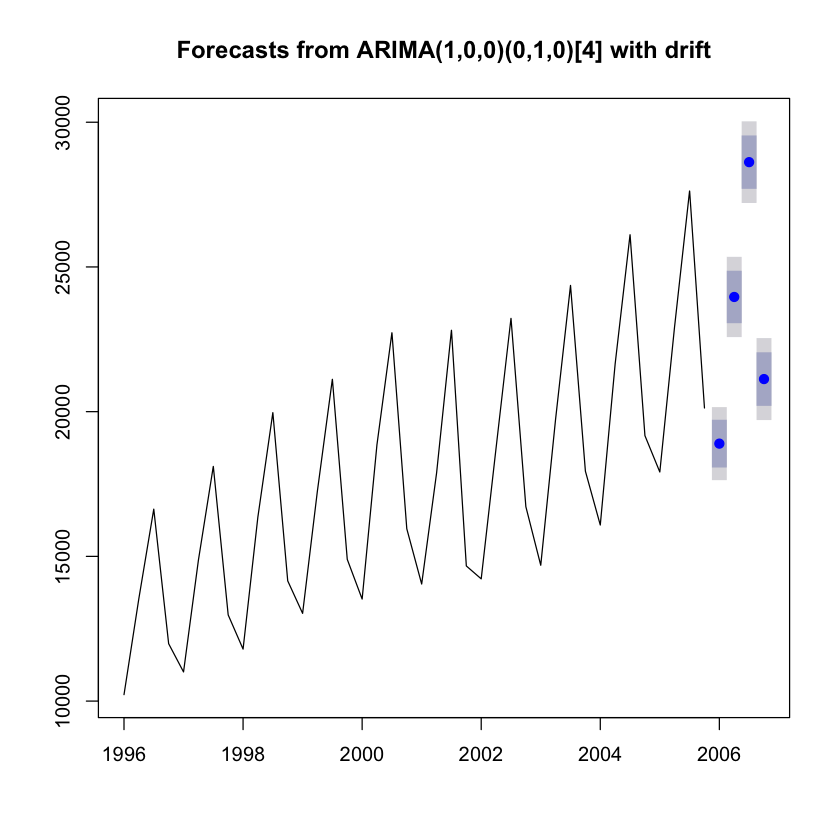

In [91]:
# Forecasting the next 4 quarters
fcast <- forecast::forecast(fit6, 4)
plot(fcast)